In [1]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

In [ ]:
#1

In [110]:
A0 = pd.read_csv('A0B0.csv', sep=',', names=['Time', 'G6P'])
A05 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'G6P'])
A1 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'G6P'])
A2 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'G6P'])
A4 = pd.read_csv('A4B24.csv', sep=',', names=['Time', 'G6P'])
A8 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'G6P'])

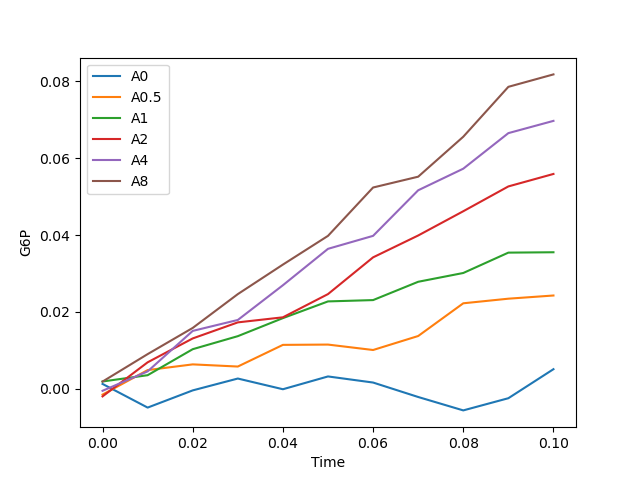

In [112]:
fig, ax = plt.subplots()
ax.plot(A0.Time, A0.G6P, label = 'A0')
ax.plot(A05.Time, A05.G6P, label = 'A0.5')
ax.plot(A1.Time, A1.G6P, label = 'A1')
ax.plot(A2.Time, A2.G6P, label = 'A2')
ax.plot(A4.Time, A4.G6P, label = 'A4')
ax.plot(A8.Time, A8.G6P, label = 'A8')
ax.set_xlabel('Time')
ax.set_ylabel('G6P')
ax.legend(loc='best')


In [108]:
B0 = pd.read_csv('A0B0.csv', sep=',', names=['Time', 'G6P'])
B15 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'G6P'])
B3 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'G6P'])
B6 = pd.read_csv('A8B6.csv', sep=',', names=['Time', 'G6P'])
B12 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'G6P'])
B24 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'G6P'])

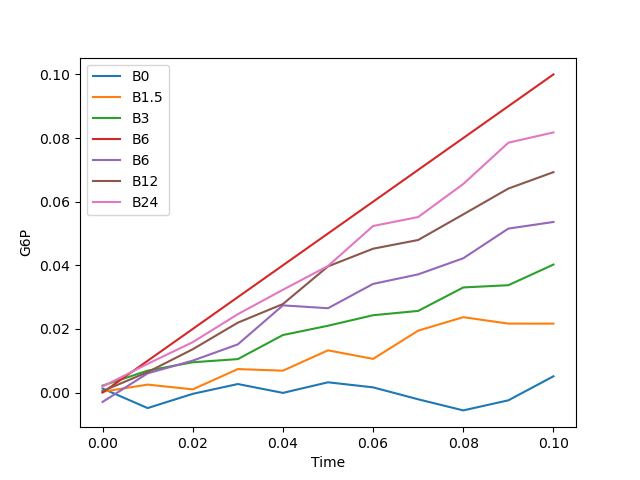

In [109]:
fig, ay = plt.subplots()
ay.plot(B0.Time, B0.G6P, label = 'B0')
ay.plot(B15.Time, B15.G6P, label = 'B1.5')
ay.plot(B3.Time, B3.G6P, label = 'B3')
ay.plot(B6.Time, B6, label = 'B6')
ay.plot(B12.Time, B12.G6P, label = 'B12')
ay.plot(B24.Time, B24.G6P, label = 'B24')
ay.set_xlabel('Time')
ay.set_ylabel('G6P')
ay.legend(loc='best')

In [113]:
regA0 = sp.stats.linregress(A0)
regA05 = sp.stats.linregress(A05)
regA1 = sp.stats.linregress(A1)
regA2 = sp.stats.linregress(A2)
regA4= sp.stats.linregress(A4)
regA8 = sp.stats.linregress(A8)

In [128]:
regressions = [regA0, regA05, regA1, regA2, regA4, regA8]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
ratesA = np.array(rates)

0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143


In [129]:
ratesA

array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884])

In [114]:
#initial rate = slope of A0.5
regA05

LinregressResult(slope=0.24118661159479945, intercept=-2.558178693360877e-05, rvalue=0.9582574280003074, pvalue=3.4186889386105484e-06, stderr=0.023986906420409505, intercept_stderr=0.0014190845213288706)

In [115]:
regB0 = sp.stats.linregress(B0)
regB15 = sp.stats.linregress(B15)
regB3 = sp.stats.linregress(B3)
regB6 = sp.stats.linregress(B6)
regB12= sp.stats.linregress(B12)
regB24 = sp.stats.linregress(B24)

In [130]:
regressions = [regB0, regB15, regB3, regB6, regB12, regB24]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
ratesB = np.array(rates)

0.004954646341627726
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [116]:
#initial rate = slope of B1.5
regB15

LinregressResult(slope=0.25422083243133853, intercept=-0.0010308904920456, rvalue=0.9557509001222069, pvalue=4.428320886536894e-06, stderr=0.02608279666582982, intercept_stderr=0.0015430790604141387)

In [134]:
ratesB

array([0.00495465, 0.25422083, 0.36795357, 0.55640883, 0.70120398,
       0.82507884])

In [160]:
ratesAB = [ratesA, ratesB]

In [161]:
ratesAB

[array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
        0.82507884]),
 array([0.00495465, 0.25422083, 0.36795357, 0.55640883, 0.70120398,
        0.82507884])]

In [164]:
concsA = np.array([0.0, 0.5, 1, 2, 4, 8, 8, 8, 8, 8, 8])
concsB = np.array([0.0, 24, 24, 24, 24, 24, 1.5, 3, 6, 12, 24])
A_and_B = pd.DataFrame({'a(mM)':concsA, 'b(mM)':concsB,'rate(mM.min-1)':0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
        0.82507884, 0.00495465, 0.25422083, 0.36795357, 0.55640883, 0.70120398,
        0.82507884})

SyntaxError: ':' expected after dictionary key (4049916350.py, line 3)

In [149]:
A_and_B

a(mM)  b(mM)  rate(mM.min-1)
0    0.0    0.0        0.004955
1    0.5   24.0        0.241187
2    1.0   24.0        0.352630
3    2.0   24.0        0.574650
4    4.0   24.0        0.732286
5    8.0   24.0        0.825079

In [ ]:
def v(vf, Ka, Kb)
    return vf*a*b/(Ka+a)(Kb+b)